For a moment, recall the Navier–Stokes equations for an incompressible fluid, where $\vec{v}$ represents the velocity field:

$$
\begin{eqnarray*}
\nabla \cdot\vec{v} &=& 0 \\
\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v} &=& -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}
\end{eqnarray*}
$$

The first equation represents mass conservation at constant density. The second equation is the conservation of momentum. But a problem appears: the continuity equation for incompressble flow does not have a dominant variable and there is no obvious way to couple the velocity and the pressure. In the case of compressible flow, in contrast, mass continuity would provide an evolution equation for the density $\rho$, which is coupled with an equation of state relating $\rho$ and $p$.

In incompressible flow, the continuity equation $\nabla \cdot\vec{v}=0$ provides a *kinematic constraint* that requires the pressure field to evolve so that the rate of expansion $\nabla \cdot\vec{v}$ should vanish everywhere. A way out of this difficulty is to *construct* a pressure field that guarantees continuity is satisfied; such a relation can be obtained by taking the divergence of the momentum equation. In that process, a Poisson equation for the pressure shows up!

Step 12: 2D Poisson Equation
----
***

Poisson's equation is obtained from adding a source term to the right-hand-side of Laplace's equation:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = b$$

So, unlinke the Laplace equation, there is some finite value inside the field that affects the solution. Poisson's equation acts to "relax" the initial sources in the field.

In discretized form, this looks almost the same as Step 11, except for the source term:

$$\frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2 p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2}=b_{i,j}^{n}$$

As before, we rearrange this so that we obtain an equation for $p$ at point $i,j$. Thus, we obtain:

$$p_{i,j}^{n}=\frac{(p_{i+1,j}^{n}+p_{i-1,j}^{n})\Delta y^2+(p_{i,j+1}^{n}+p_{i,j-1}^{n})\Delta x^2-b_{i,j}^{n}\Delta x^2\Delta y^2}{2(\Delta x^2+\Delta y^2)}$$

We will solve this equation by assuming an initial state of $p=0$ everywhere, and applying boundary conditions as follows:

$p=0$ at $x=0, \ 2$ and $y=0, \ 2$

and the source term consists of two initial spikes inside the domain, as follows:

$b=100$ at $(x,y) = (0.5,0.5)$

$b=-100$ at $(x,y) = (1.5,1.5)$

$b_{i,j}=0$ everywhere else.



In [1]:
import numpy as np
from matplotlib import pyplot as plt, cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# parameter definitions

nx = 50
ny = 50
nt = 100
xmin = 0
xmax = 2
ymin = 0
ymax = 2

dx = (xmax - xmin) / (nx - 1)
dy = (ymax - ymin) / (ny - 1)

p = np.zeros((nx, ny))
b = np.zeros((nx, ny))
x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)

# define source term
b[int(nx/4),int(nx/4)] = 100
b[int(3*ny/4),int(3*ny/4)] = -100


In [3]:
def plot2D(x,y,p):  # define a function for visulizing 2d plot
    fig = plt.figure(figsize = (11,7), dpi=100)
    ax = fig.add_subplot(111, projection='3d')
    # The '111' means a grid of 1 row and 1 column and this subplot is the first one.
    X, Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,p,cmap=cm.viridis)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$');

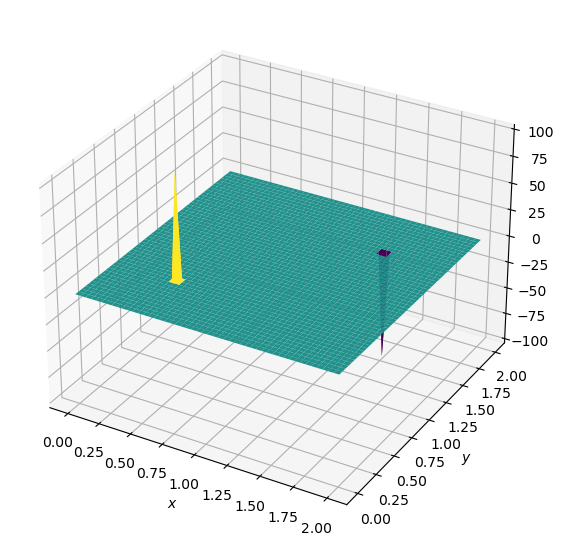

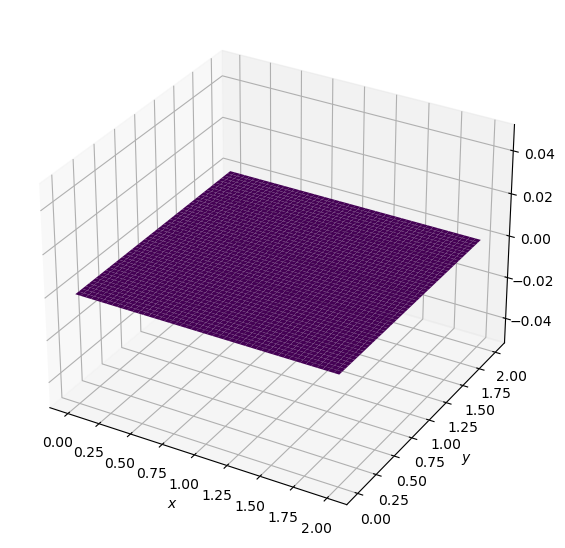

In [4]:
plot2D(x,y,b)
plot2D(x,y,p)

In [5]:
def poisson2d(p, b, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.zeros_like(p)
    small = 1e-8
    niter = 0
    while l1norm > l1norm_target:
        niter += 1   # count the number of iterations for convergence
        pn = p.copy()
        p[1:-1,1:-1] = ((dy**2 * (pn[2:,1:-1] + pn[:-2,1:-1]) +
                        dx**2 * (pn[1:-1,2:] + pn[1:-1,:-2]) -
                        dx**2 * dy**2 * b[1:-1,1:-1]) /
                        (2 * (dx**2 + dy**2)))
        p[0,:] = 0  # p = 0 @ x = 0
        p[-1:,] = 0 # p = 0 @ x = 2
        p[:,0] = 0 # p = 0 @ y = 0
        p[:,-1] = 0 # p = 0 @ y = 2  
        l1norm = (np.sum(np.abs(p[:]-pn[:])) / (np.sum(np.abs(pn[:]))+small))
        
    return p, niter

Output of this function is a tuple (Python Tuple is a collection of objects separated by commas)

In [6]:
p, niter = poisson2d(p, b, dx, dy, 1e-4)  
print('# of iterations =', niter)

# of iterations = 791


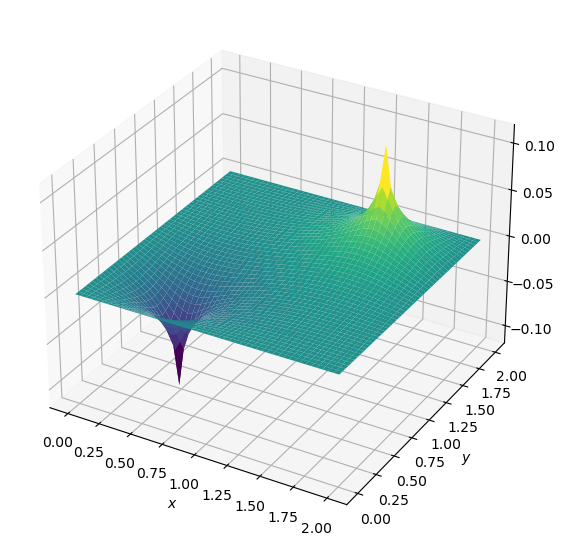

In [7]:
plot2D(x,y,p)

Ah! The wonders of code reuse! Now, you probably think: "Well, if I've written this neat little function that does something so useful, I want to use it over and over again. How can I do this without copying and pasting it each time? —If you are very curious about this, you'll have to learn about *packaging*. But this goes beyond the scope of our CFD lessons. You'll just have to Google it if you really want to know.